In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
concret = pd.read_csv("C:\\Users\\Nik\\Downloads\\concrete (1).csv")

In [3]:
concret.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
concret.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

33.40    6
71.30    4
41.05    4
31.35    4
23.52    4
        ..
38.33    1
10.73    1
30.45    1
39.84    1
36.25    1
Name: strength, Length: 845, dtype: int64

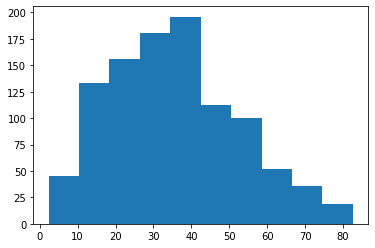

In [5]:
X = concret.drop(['strength'],axis=1)
Y = concret['strength']
plt.hist(Y)
concret.strength.value_counts()


In [10]:
concret.astype(int)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540,0,0,162,2,1040,676,28,79
1,540,0,0,162,2,1055,676,28,61
2,332,142,0,228,0,932,594,270,40
3,332,142,0,228,0,932,594,365,41
4,198,132,0,192,0,978,825,360,44
...,...,...,...,...,...,...,...,...,...
1025,276,116,90,179,8,870,768,28,44
1026,322,0,115,196,10,817,813,28,31
1027,148,139,108,192,6,892,780,28,23
1028,159,186,0,175,11,989,788,28,32


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
Xtrain=X_train.astype(int)
Xtest=X_test.astype(int)
ytrain=y_train.astype(int)
ytest=y_test.astype(int)

In [12]:

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30,30))

mlp.fit(Xtrain,ytrain)
prediction_train=mlp.predict(Xtrain)
prediction_test = mlp.predict(Xtest)


C:\Users\Nik\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,prediction_test))
np.mean(ytest==prediction_test)
np.mean(ytrain==prediction_train)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.16580310880829016